In [21]:
# ! pip install keras-tuner

In [22]:
#import libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#keras libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#sklearn libraries
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [24]:
#import data
#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#data dimensions
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [25]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [29]:
#reshape and scalling of data

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

print(x_train.shape)
print(np.unique(x_train))

(60000, 28, 28, 1)
[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 

In [30]:
# random image generator
def random_img(x,y):
  random_index = random.randint(0,len(x))
  plt.imshow(x[random_index],cmap='grey')
  plt.show()
  print(f'This image is for {labels[y[random_index]]}')

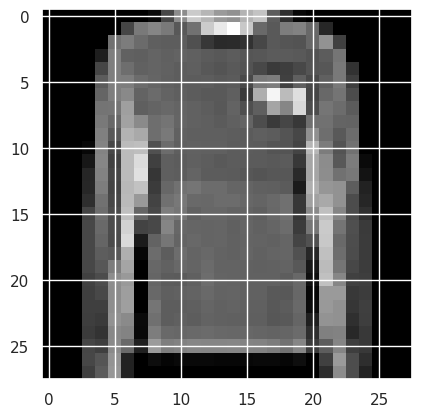

This image is for Pullover


In [31]:
random_img(x_train,y_train)

In [48]:
# CNN Architecture build

def hyper_model(hp):
  model = Sequential([
      Conv2D(filters=hp.Int('con_1_layer',min_value=32,max_value=256,step=8),     #no of filters
             kernel_size=hp.Choice('kernel_1',[2,3,4]),                           #filter size
             kernel_initializer='he_uniform',
             activation=hp.Choice('activation_1',['relu','softmax','tanh','sigmoid']),
             input_shape=(28,28,1)),
      MaxPooling2D((2,2)),

      Conv2D(filters=hp.Int('con_2_layer',min_value=8,max_value=64,step=8),
             kernel_size=hp.Choice('kernel_2',[2,3,4]),
             activation=hp.Choice('activation_2',['relu','softmax','tanh','sigmoid'])),
      MaxPooling2D((2,2)),

      Flatten(),

      Dense(units=hp.Int('input_layer',32,256,4),
            activation=hp.Choice('dense_activation_1',['relu','tanh','sigmoid','softmax'])),
      Dense(units=hp.Int('hidden_layer_1',16,126,4),
            activation=hp.Choice('dense_activation_2',['relu','tanh','sigmoid','softmax'])),
      Dense(units=hp.Fixed('output_layer',10),
            activation=hp.Choice('dense_activation_3',['relu','tanh','sigmoid','softmax']))
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-1,1e-2,1e-3])), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [49]:
tuner = RandomSearch(hyper_model,
                     objective='val_accuracy',
                     max_trials=5,
                     seed=42)

In [50]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
con_1_layer (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 8, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh', 'sigmoid'], 'ordered': False}
con_2_layer (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh', 'sigmoid'], 'ordered': False}
input_layer (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 4, 'sampling': 'linear'}
dense_activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'softmax'], 'ordered': False}
hidden_layer_1 (I

In [55]:
#fitting the data
es = EarlyStopping(monitor='val_loss',mode='auto',patience=3,verbose=1)
tuner.search(x_train,y_train,epochs=20,batch_size=16,validation_split=0.2,callbacks=[es])

Trial 5 Complete [00h 06m 04s]
val_accuracy: 0.8837500214576721

Best val_accuracy So Far: 0.9012500047683716
Total elapsed time: 00h 16m 38s


In [62]:
#get best model from tuner
best_model_hyperpara = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_model_hyperpara.values)

best_model = tuner.get_best_models(num_models=1)[0]

#model summary
best_model.summary()

{'con_1_layer': 176, 'kernel_1': 2, 'activation_1': 'softmax', 'con_2_layer': 24, 'kernel_2': 4, 'activation_2': 'softmax', 'input_layer': 156, 'dense_activation_1': 'relu', 'hidden_layer_1': 68, 'dense_activation_2': 'relu', 'output_layer': 10, 'dense_activation_3': 'sigmoid', 'learning_rate': 0.001}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 176)    │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 176)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 24)     │        67,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 156)            │        93,756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 68)             │        10,676 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,610 (678.16 KB)

 Trainable params: 173,610 (678.16 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#train on best model
es = EarlyStopping(monitor='val_loss',mode='auto',patience=3,verbose=1)
model_hist = best_model.fit(x_train,y_train,epochs=30,initial_epoch=20,validation_split=0.2,callbacks=[es])

Epoch 21/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9388 - loss: 0.1594 - val_accuracy: 0.9063 - val_loss: 0.2896
Epoch 22/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9407 - loss: 0.1530 - val_accuracy: 0.9047 - val_loss: 0.2969
Epoch 23/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9445 - loss: 0.1451 - val_accuracy: 0.9029 - val_loss: 0.3025
Epoch 24/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9458 - loss: 0.1434 - val_accuracy: 0.9040 - val_loss: 0.3048
Epoch 24: early stopping


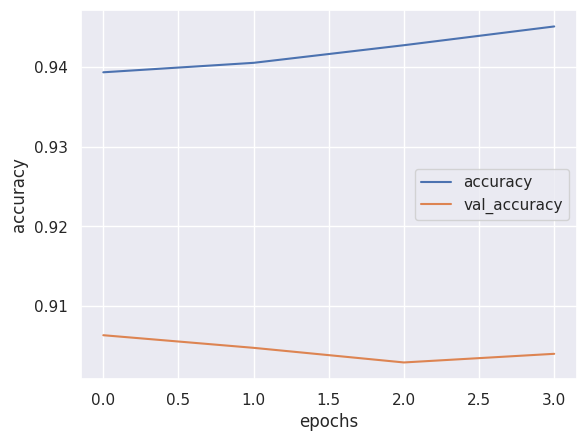

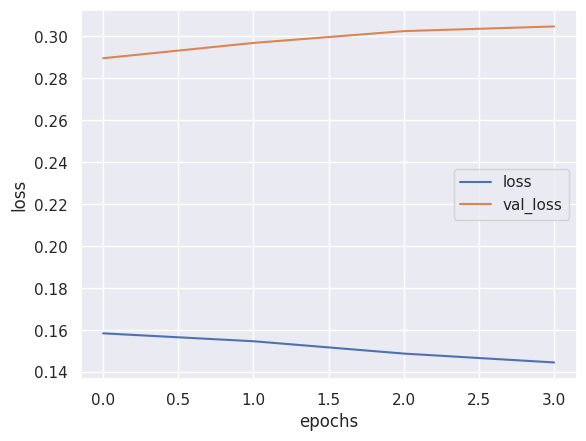

In [141]:
#plot accuracy vs val_accuracy
plt.plot(model_hist.history['accuracy'],label='accuracy')
plt.plot(model_hist.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plot loss vs val_loss
plt.plot(model_hist.history['loss'],label='loss')
plt.plot(model_hist.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [85]:
# print(model_hist.history)


#model evalution
best_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8985 - loss: 0.3329


[0.3240016996860504, 0.8988999724388123]

In [86]:
#prediction

y_pred = best_model.predict(x_test)

y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.11696627e-05, 4.76492090e-08, 2.88819160e-06, ...,
        1.41324848e-01, 4.81691086e-06, 9.99955773e-01],
       [8.34987462e-01, 1.05840076e-11, 9.98231947e-01, ...,
        1.65345892e-21, 1.13446674e-07, 1.63033335e-12],
       [1.79738490e-05, 9.99999881e-01, 2.93908968e-08, ...,
        8.25284729e-10, 1.13493854e-07, 9.22195607e-17],
       ...,
       [8.80351663e-03, 1.04320307e-18, 2.97610683e-08, ...,
        1.84986168e-14, 1.00000000e+00, 1.20763054e-14],
       [2.73976616e-06, 9.99993682e-01, 6.06419137e-10, ...,
        3.05777445e-04, 3.04403436e-08, 1.93961482e-14],
       [3.99598794e-04, 3.08593791e-08, 1.35193091e-07, ...,
        2.74402034e-02, 2.18743080e-04, 4.91744000e-03]], dtype=float32)

In [102]:
y_pred[0]

array([1.1169663e-05, 4.7649209e-08, 2.8881916e-06, 1.1241808e-06,
       1.1401876e-06, 2.5385144e-01, 3.4224435e-05, 1.4132485e-01,
       4.8169109e-06, 9.9995577e-01], dtype=float32)

In [101]:
np.argmax(y_pred[0])

np.int64(9)

In [89]:
y_test[0]

np.uint8(9)

In [120]:
# predict random image
y_pred_new = [int(np.argmax(i)) for i in y_pred]
def predict_img():
  rand_i = random.randint(0,len(x_test))
  plt.imshow(x_train[rand_i],cmap='grey')
  plt.show()
  print(f'Original image is {labels[y_test[rand_i]]}')
  print(f'Predicted image is {labels[y_pred_new[rand_i]]}')
  print('Prediction probability is',round(y_pred[rand_i][y_pred_new[rand_i]]*100,2),' %')

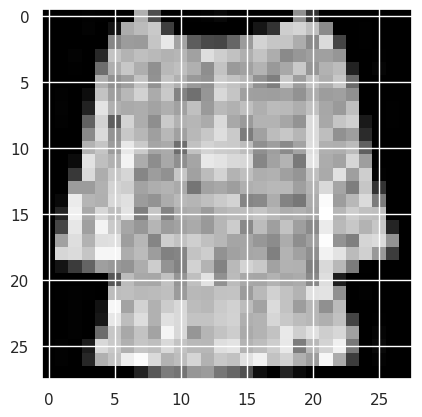

Original image is Pullover
Predicted image is Bag
Prediction probability is 95.2  %


In [138]:
predict_img()

Classification Report:

               precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.91      0.77      0.83      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.80      0.86      0.83      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.71      0.75      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



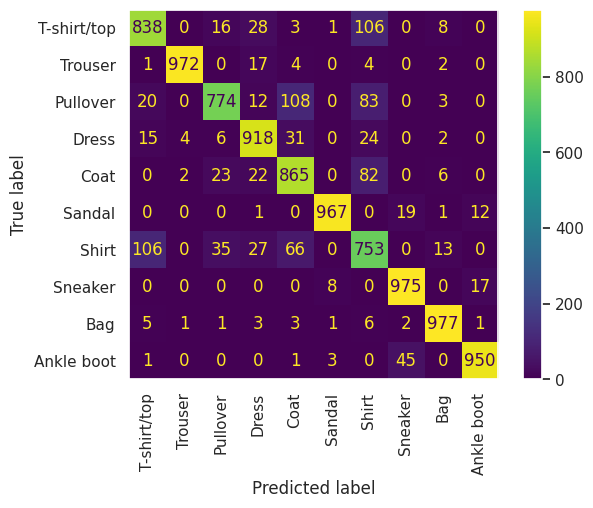

In [140]:
#metrix evaluation

print('Classification Report:\n\n',classification_report(y_test,y_pred_new,target_names=labels))

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_new, display_labels=labels, xticks_rotation='vertical')
plt.grid('')
plt.show()